In [1]:
from helpers import *
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set globals for all simulations to keep them comparable
NUM_SIM = 200
NUM_CUST = 500
SERVICE_TIME = 2

p = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
intervalCustomers = SERVICE_TIME/p

In [3]:
#2.2
simulator1 = queuSim(capacity=1, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2)
simulator2 = queuSim(capacity=2, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2)
simulator4 = queuSim(capacity=4, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2)

In [4]:
# waitTimesX contain a list with sublists where each sublist contains all the customer waiting times
# of one simulation
waitTimes1 = simulator1.runSim()
waitTimes2 = simulator2.runSim()
waitTimes4 = simulator4.runSim()

In [5]:
# we compute the mean waiting times per simulation and store them in a list
means_1server = []
for sim in waitTimes1:
    means_1server.append(np.mean(sim))

means_2server = []
for sim in waitTimes2:
    means_2server.append(np.mean(sim))

means_4server = []
for sim in waitTimes4:
    means_4server.append(np.mean(sim))

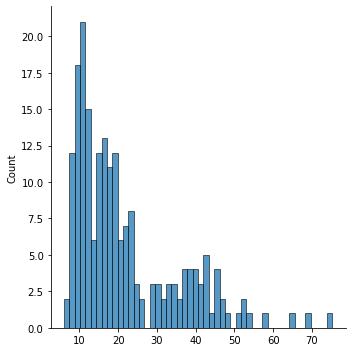

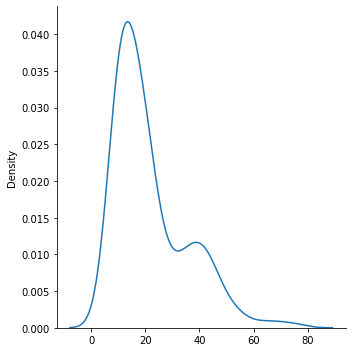

In [6]:
# GET DISTRIBUTIONS FOR n = 1, 2, 4 server 

# bin the means over 50 bins to get approximate distribution
sns.displot(means_1server, bins=50)
# sns.displot(means_2server, bins=50)
# sns.displot(means_4server, bins=50)
# Kernel density estimation (kde)
sns.displot(means_1server, kind="kde")
# sns.displot(means_2server, kind="kde")
# sns.displot(means_4server, kind="kde")

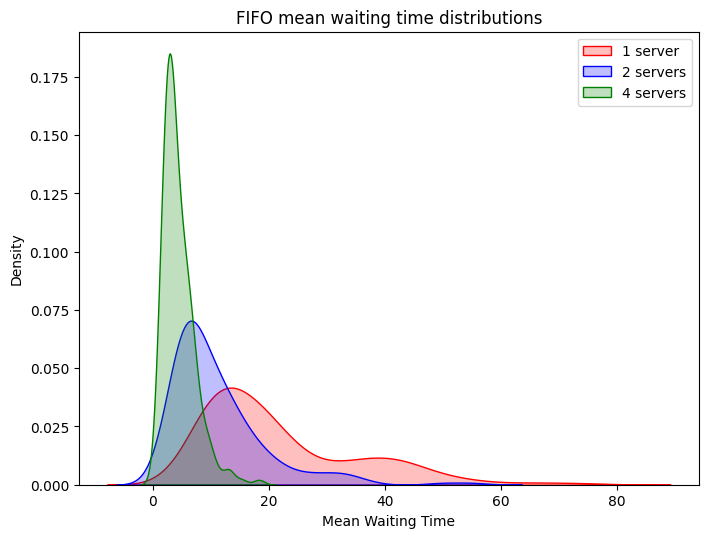

In [7]:
# COMPARING THE DISTRIBUTIONS of n = 1, 2, 4 servers
# plotting the distributions (using kde) in one figure 
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
ax = sns.kdeplot(means_1server, shade=True, color="r", label='1 server')
ax = sns.kdeplot(means_2server, shade=True, color="b", label='2 servers')
ax = sns.kdeplot(means_4server, shade=True, color="g", label='4 servers')
plt.xlabel('Mean Waiting Time')
plt.title('FIFO mean waiting time distributions')
plt.legend()
plt.show()

### Interpretation of distributions
Increasing the number of servers for M/M/n problems leads to a mean lower waiting time. In addition, standard deviation around the mean is lower. All three distributions show a somewhat fat right tail, meaning high waiting times sometimes. However, tails are longer and fatter for less servers (i.e. 1 server shows fatter right tail than 2 servers, and in turn, 2 servers shows fatter right tail than 4 servers.)

In [8]:
# ANSWER TO QUESTION 2.1 

# test if the mean waiting times for three different server groups are different, i.e. n = 1, 2, 4 
# are statistically significantly different
print('Test for different means (ANOVA): ', st.f_oneway(means_1server, means_2server, means_4server))

# we also want to test if the mean waiting times are different between 2 servers, i.e.
print('1 server vs. 4 servers: ', st.ttest_ind(means_1server, means_4server))
print('1 server vs. 2 servers: ', st.ttest_ind(means_1server, means_2server))
print('2 servers vs. 4 servers: ', st.ttest_ind(means_2server, means_4server))

Test for different means (ANOVA):  F_onewayResult(statistic=180.46516584742028, pvalue=5.013733721963472e-62)
1 server vs. 4 servers:  Ttest_indResult(statistic=17.951255431823107, pvalue=3.257568720120973e-53)
1 server vs. 2 servers:  Ttest_indResult(statistic=9.591813521463736, pvalue=9.717393623408152e-20)
2 servers vs. 4 servers:  Ttest_indResult(statistic=10.903795944569717, pvalue=2.1248452644929965e-24)


### Interpretation of statistical tests:
Mean waiting times for different servers, i.e. n = 1,2,4 are significantly different at 1% (ANOVA test result). Also comparing the waiting times between two servers leads results in statistically significant differences between the means (at 1% level).

### Same analysis for SJF (Q3)

In [9]:
sjf_simulator1 = queuSim(capacity=1, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2, helpStrat = "SJF")
sjf_simulator2 = queuSim(capacity=2, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2, helpStrat = "SJF")
sjf_simulator4 = queuSim(capacity=4, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2, helpStrat = "SJF")
# waitTimesX contain a list with sublists where each sublist contains all the customer waiting times
# of one simulation
sjf_waitTimes1 = sjf_simulator1.runSim()
sjf_waitTimes2 = sjf_simulator2.runSim()
sjf_waitTimes4 = sjf_simulator4.runSim()
# we compute the mean waiting times per simulation and store them in a list
sjf_means_1server = []
for sim in sjf_waitTimes1:
    sjf_means_1server.append(np.mean(sim))

sjf_means_2server = []
for sim in sjf_waitTimes2:
    sjf_means_2server.append(np.mean(sim))

sjf_means_4server = []
for sim in sjf_waitTimes4:
    sjf_means_4server.append(np.mean(sim))

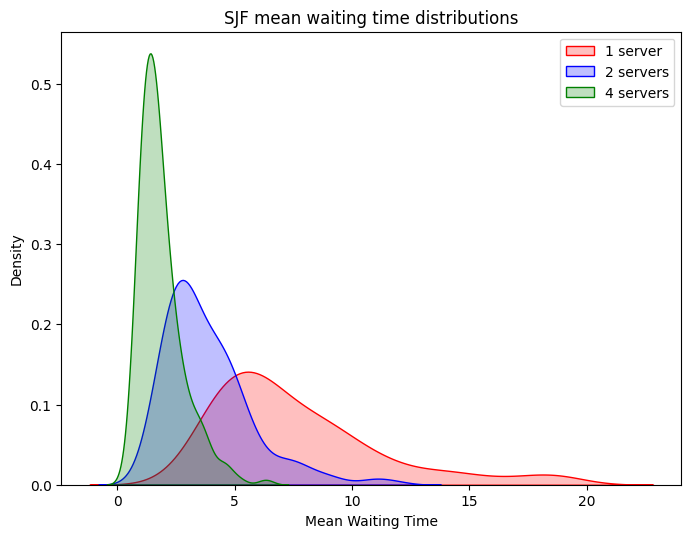

In [10]:
# COMPARING THE DISTRIBUTIONS of n = 1, 2, 4 servers for SJF 
# plotting the distributions (using kde) in one figure 
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
ax = sns.kdeplot(sjf_means_1server, shade=True, color="r", label='1 server')
ax = sns.kdeplot(sjf_means_2server, shade=True, color="b", label='2 servers')
ax = sns.kdeplot(sjf_means_4server, shade=True, color="g", label='4 servers')
plt.xlabel('Mean Waiting Time')
plt.title('SJF mean waiting time distributions')
plt.legend()
plt.show()

### Let's now compare distributions for SJF vs. FIFO for a given number of n servers


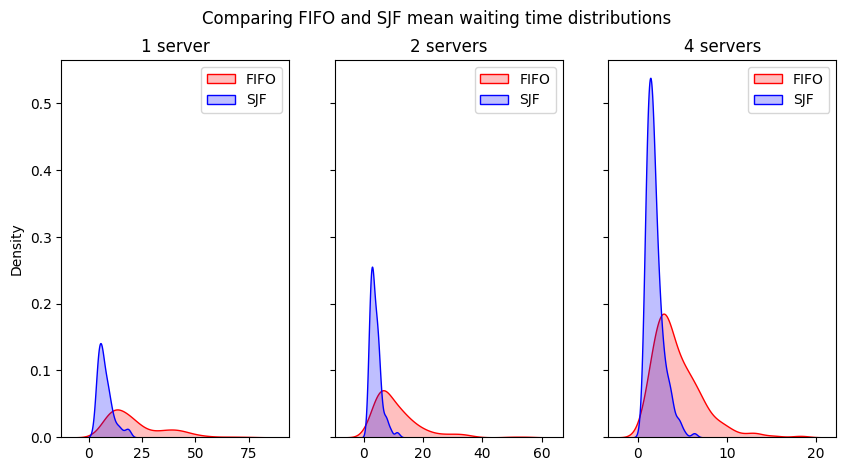

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5), dpi=100, sharey=True)
sns.kdeplot(ax=ax1, x=means_1server, shade=True, color="r", label='FIFO')
sns.kdeplot(ax=ax1, x=sjf_means_1server, shade=True, color="b", label='SJF')

sns.kdeplot(ax=ax2, x=means_2server, shade=True, color="r", label='FIFO')
sns.kdeplot(ax=ax2, x=sjf_means_2server, shade=True, color="b", label='SJF')

sns.kdeplot(ax=ax3, x=means_4server, shade=True, color="r", label='FIFO')
sns.kdeplot(ax=ax3, x=sjf_means_4server, shade=True, color="b", label='SJF')

ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_title('1 server')
ax2.set_title('2 servers')
ax3.set_title('4 servers')
fig.suptitle('Comparing FIFO and SJF mean waiting time distributions')
plt.show()


In [12]:
# ANSWER TO QUESTION 3.1 
# Testing for difference in means
# we also want to test if the mean waiting times are different between 2 servers, i.e.
print('1 server FIFO vs. SJF: ', st.ttest_ind(means_1server, sjf_means_1server))
print('2 servers FIFO vs. SJF: ', st.ttest_ind(means_2server, sjf_means_2server))
print('4 servers FIFO vs. SJF ', st.ttest_ind(means_4server, sjf_means_4server))

1 server FIFO vs. SJF:  Ttest_indResult(statistic=14.39437052446777, pvalue=4.0885226193456376e-38)
2 servers FIFO vs. SJF:  Ttest_indResult(statistic=12.138466680582198, pvalue=4.5979391111411366e-29)
4 servers FIFO vs. SJF  Ttest_indResult(statistic=12.32925404070824, pvalue=8.338384863725937e-30)


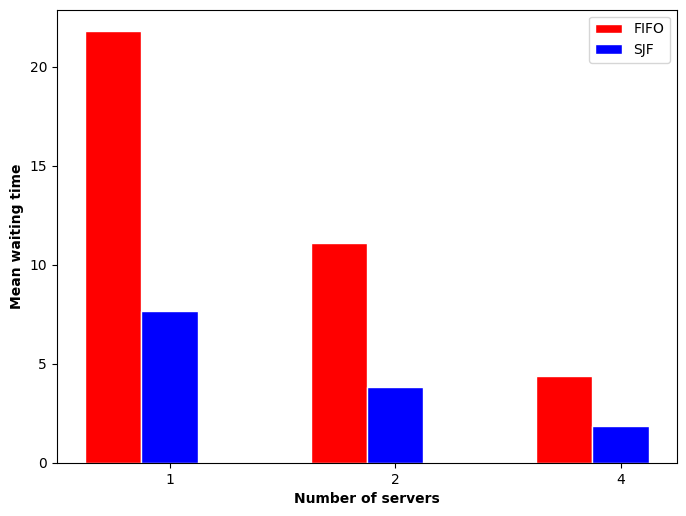

In [13]:
# ANSWER TO QUESTION 3.1 
# Comparing means

 # set width of bars
barWidth = 0.25

bar1 = [np.mean(means_1server), np.mean(means_2server), np.mean(means_4server)]
bar2 = [np.mean(sjf_means_1server), np.mean(sjf_means_2server), np.mean(sjf_means_4server)]
 
# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]

 
# Make the plot
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(r1, bar1, color='red', width=barWidth, edgecolor='white', label='FIFO')
ax.bar(r2, bar2, color='blue', width=barWidth, edgecolor='white', label='SJF')

# Add xticks on the middle of the group bars
plt.ylabel('Mean waiting time', fontweight='bold')
plt.xlabel('Number of servers', fontweight='bold')
plt.xticks([r + barWidth for r in range(3)], [1,2,4])
 
# Create legend & Show graphic
plt.legend()
plt.show()


### Interpretation of comparing mean waiting time FIFO vs. SJF
Based on above t-tests, mean waiting times are different under FIFO vs. SJF job-scheduling systems.

In [36]:
# we can reject the null hypothesis
# st.f_oneway(waitTimes1, waitTimes2, waitTimes4)

In [6]:
# post hoc tests prove that there are differences between all populations
# print(st.ttest_ind(waitTimes1, waitTimes4))
# print(st.ttest_ind(waitTimes1, waitTimes2))
# print(st.ttest_ind(waitTimes2, waitTimes4))

Ttest_indResult(statistic=30.861599623626457, pvalue=2.226488287022049e-147)
Ttest_indResult(statistic=-8.774896281073326, pvalue=7.291682212052261e-18)
Ttest_indResult(statistic=34.939830151997825, pvalue=2.4301689075511923e-175)


In [7]:
print(np.mean(waitTimes1))
print(np.mean(waitTimes2))
print(np.mean(waitTimes4))

25.124026092940785
35.91708204635628
1.7651491934051424


In [135]:
# ADJUSTED ANSWER TO 2.2 
# we want 1% significance level for each simulation
# 2.2, run multiple simulations for different p
# service time is fixed at 2 
# customer intervals gets scaled for the amount of servers
# p = 2/intervalcustomers
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []




for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()

    results_1server = []
    std_1server = []
    for sim in result1:
        results_1server.append(np.mean(sim))

    results_2server = []
    std_2server = []
    for sim in result2:
        results_2server.append(np.mean(sim))

    results_4server = []
    std_4server = []
    for sim in result4:
        results_4server.append(np.mean(sim))

    means1.append(results_1server)
    means2.append(results_2server)
    means4.append(results_4server)

In [150]:
rhoVals = np.around(SERVICE_TIME/intervalCustomers, 1)
print(rhoVals)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [136]:
Anova_results = []
ttest_14_results = []
ttest_12_results = []
ttest_24_results = []
for i in range(len(means1)):
    stat, pval = st.f_oneway(means1[i], means2[i], means4[i])
    Anova_results.append(stat)
    stat, pval = st.ttest_ind(means1[i], means4[i])
    ttest_14_results.append(stat)
    stat, pval = st.ttest_ind(means1[i], means2[i])
    ttest_12_results.append(stat)
    stat, pval = st.ttest_ind(means2[i], means4[i])
    ttest_24_results.append(stat)

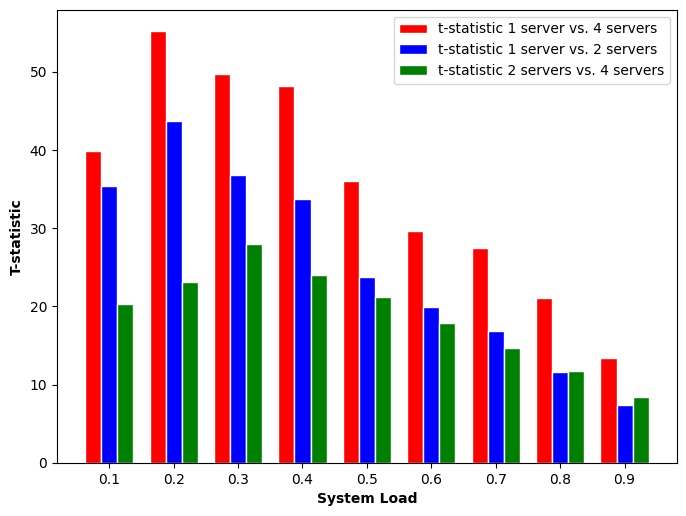

9


In [195]:
 # set width of bars
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(Anova_results))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

 
# Make the plot
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(r1, ttest_14_results, color='red', width=barWidth, edgecolor='white', label='t-statistic 1 server vs. 4 servers')
ax.bar(r2, ttest_12_results, color='blue', width=barWidth, edgecolor='white', label='t-statistic 1 server vs. 2 servers')
ax.bar(r3, ttest_24_results, color='green', width=barWidth, edgecolor='white', label='t-statistic 2 servers vs. 4 servers')

# Add xticks on the middle of the group bars
plt.ylabel('T-statistic', fontweight='bold')
plt.xlabel('System Load', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Anova_results))], rhoVals)
 
# Create legend & Show graphic
plt.legend()
plt.show()

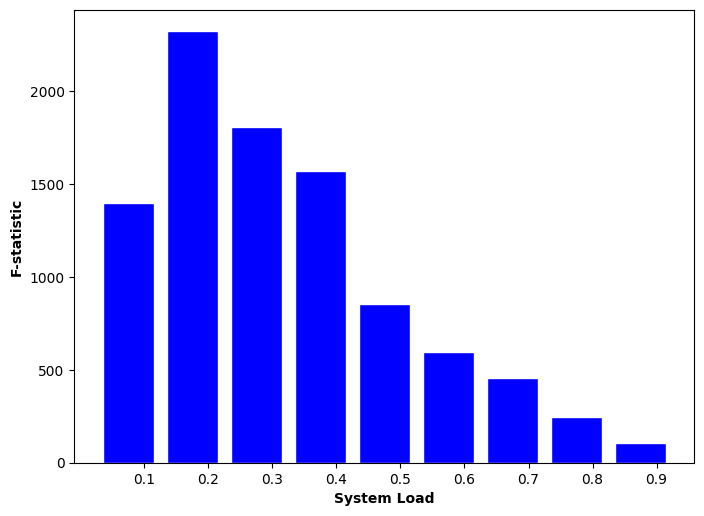

In [153]:


 # set width of bars
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(Anova_results))

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(r1, Anova_results, color='blue', edgecolor='white', label='')

# Add xticks on the middle of the group bars
plt.ylabel('F-statistic', fontweight='bold')
plt.xlabel('System Load', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Anova_results))], rhoVals)
 
# Create legend & Show graphic
# plt.legend()
plt.show()

In [8]:
# 2.2, run multiple simulations for different p
# service time is fixed at 2 
# customer intervals gets scaled for the amount of servers
# p = 2/intervalcustomers
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()        
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

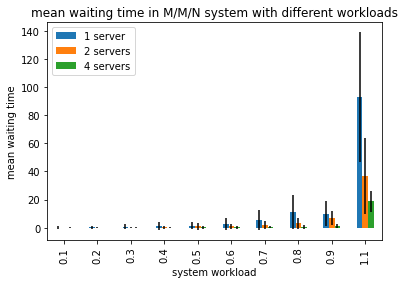

In [9]:
dfAllMar = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllMar.plot.bar(title = "mean waiting time in M/M/N system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)

In [10]:
# assignment 2.3, use a different service strategy. Shortest job first(SJF).
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST, helpStrat = "SJF", intervalCustomers = time)
    simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, helpStrat = "SJF", intervalCustomers = time)
    simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, helpStrat = "SJF", intervalCustomers = time)
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

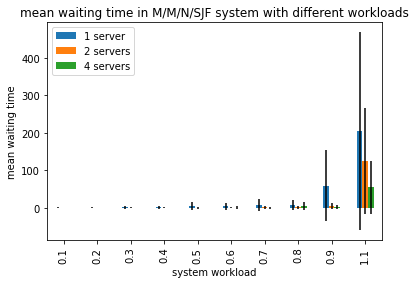

In [11]:
dfAllSJF = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllSJF.plot.bar(title = "mean waiting time in M/M/N/SJF system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)

In [12]:
##2.4
# Deterministic sercive distribution
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "D")
    simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "D")
    simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "D")
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

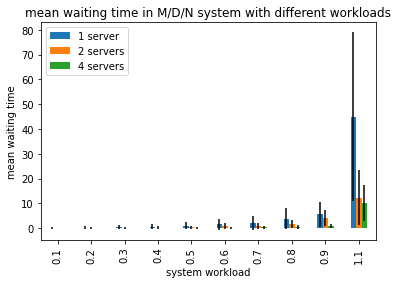

In [13]:
dfAllDet = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllDet.plot.bar(title = "mean waiting time in M/D/N system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)

In [14]:
##2.4
# Deterministic sercive distribution
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "H")
    simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "H")
    simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "H")
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

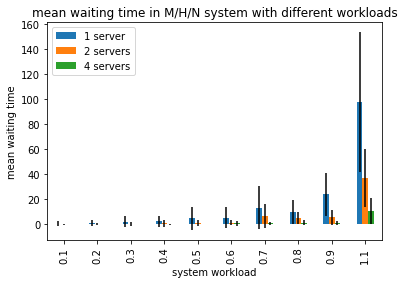

In [15]:
dfAllHyp = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllHyp.plot.bar(title = "mean waiting time in M/H/N system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)